In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = dataset.iloc[:,[3,4]].values          #when we plot a 2-D graph, we need one axis for each feature
                                #which will be difficult with more than 2 features. hence we took only 3,4

In [4]:
from sklearn.cluster import KMeans

In [5]:
wscc = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wscc.append(kmeans.inertia_)

In [6]:
wscc

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30241.34361793659,
 25336.946861471864,
 21850.165282585633,
 19634.55462934998]

## elbow method

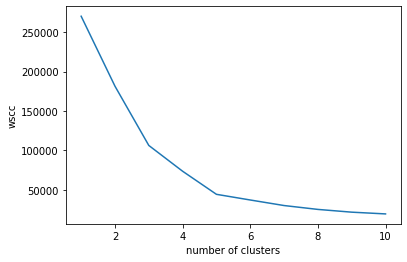

In [7]:
plt.plot(range(1,11), wscc)
plt.xlabel('number of clusters')
plt.ylabel('wscc')
plt.show()

In [8]:
#number of clusters = 5 - optimal

In [9]:
cluster = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = cluster.fit_predict(x)
print(y_pred)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


# visualization

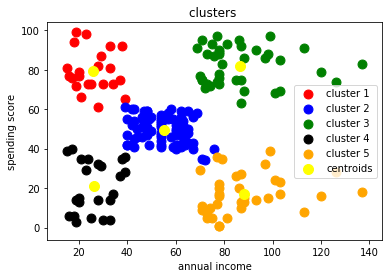

In [10]:
plt.scatter(x[y_pred==0,0], x[y_pred == 0, 1], s = 80, color = 'red', label = 'cluster 1')
plt.scatter(x[y_pred==1,0], x[y_pred == 1, 1], s = 80, color = 'blue', label = 'cluster 2' )
plt.scatter(x[y_pred==2,0], x[y_pred == 2, 1], s = 80, color = 'green', label = 'cluster 3' )
plt.scatter(x[y_pred==3,0], x[y_pred == 3, 1], s = 80, color = 'black' , label = 'cluster 4')
plt.scatter(x[y_pred==4,0], x[y_pred == 4, 1], s = 80, color = 'orange', label = 'cluster 5')
plt.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1], s = 100, color = 'yellow', label = 'centroids')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.title('clusters ')
plt.legend()
plt.show()